In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Datasets/CL"

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Datasets/CL

/content/drive/MyDrive/Datasets/CL


In [4]:
!pwd

/content/drive/MyDrive/Datasets/CL


In [5]:
import numpy as np  #to word with images and tensors
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import os
import tqdm # to keep track of callbacks and progress bars
import skimage.io # use to deal with numpy images, it has 3 different channels for RGB respectively
import glob # used to return all file paths that match a specific pattern

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize

from sklearn.utils import shuffle 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential # used to stack layers
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # callbacks

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [6]:
train_path = "/content/drive/MyDrive/Datasets/CL/train"
test_path = "/content/drive/MyDrive/Datasets/CL/test"
valid_path = "/content/drive/MyDrive/Datasets/CL/valid"

In [7]:
#set globals
BATCH_SIZE = 64
EPOCHS = 25
SEED = 49
IMAGE_SHAPE = (224,224,3)
N_CLASSES = 3
STEPS = 50

In [ ]:
# ALEXNET

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

# Define the input shape
input_shape = (224, 224, 3)


In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization



# Define the model architecture
model = Sequential([
    # Convolutional layers
    Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    # Flatten layer
    Flatten(),
    # Fully connected layers
    Dense(units=4096, activation='relu'),
    Dropout(0.5),
    Dense(units=4096, activation='relu'),
    Dropout(0.5),
    # Output layer
    Dense(units=3, activation='softmax')
])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [ ]:


train_datagen = ImageDataGenerator(dtype='float32')
train_gen = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = input_shape[:2],
                                                   class_mode = 'categorical')



valid_datagen = ImageDataGenerator(dtype='float32')
validation_gen = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = input_shape[:2],
                                                   class_mode = 'categorical')


Found 6658 images belonging to 3 classes.
Found 1819 images belonging to 3 classes.


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#model.compile(optimizer = tensorflow.keras.optimizers.Adam(1e-5), loss = 'categorical_crossentropy', metrics = ['acc'])
# Defining callbacks
filepath = '/content/drive/MyDrive/Datasets/CL/final_model/ALEX.hdf5'

early_stopping = EarlyStopping(monitor = 'val_loss', 
                              mode = 'min' , 
                              patience = 15)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_loss', 
                                mode='min', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [early_stopping, checkpoint]

In [ ]:
# Train the model

# EPOCHS = 15
history_model = model.fit(train_gen,
                               epochs = 25,
                               verbose = 1,
                               validation_data = validation_gen,
                               callbacks = [checkpoint, early_stopping])


Epoch 1/25
105/105 [==============================] - ETA: 0s - loss: 31.7701 - accuracy: 0.8049
Epoch 1: val_loss improved from inf to 0.52134, saving model to /content/drive/MyDrive/Datasets/CL/final_model/ALEX.hdf5
105/105 [==============================] - 1729s 16s/step - loss: 31.7701 - accuracy: 0.8049 - val_loss: 0.5213 - val_accuracy: 0.7345
Epoch 2/25
105/105 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.9009
Epoch 2: val_loss improved from 0.52134 to 0.41188, saving model to /content/drive/MyDrive/Datasets/CL/final_model/ALEX.hdf5
105/105 [==============================] - 58s 550ms/step - loss: 0.2256 - accuracy: 0.9009 - val_loss: 0.4119 - val_accuracy: 0.7515
Epoch 3/25
105/105 [==============================] - ETA: 0s - loss: 0.1820 - accuracy: 0.9144
Epoch 3: val_loss improved from 0.41188 to 0.25917, saving model to /content/drive/MyDrive/Datasets/CL/final_model/ALEX.hdf5
105/105 [==============================] - 59s 567ms/step - loss: 0.182

In [ ]:
from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/CL/final_model/ALEX.hdf5')


#VALIDATION DATA

pred_datagen = ImageDataGenerator(dtype='float32')
pred_gen = pred_datagen.flow_from_directory(valid_path,
                                            batch_size = BATCH_SIZE,
                                            target_size=(224,224),
                                            class_mode = 'categorical', 
                                            shuffle=False)
model_pred = model.predict(pred_gen)
pred = []
for i in model_pred:
  pred.append(np.argmax(i))

accuracy_score(pred_gen.classes, pred)

Found 1819 images belonging to 3 classes.
29/29 [==============================] - 11s 370ms/step


0.9241341396371633

In [ ]:

# Evaluate the model - TEST DATA

from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/CL/final_model/ALEX.hdf5')

test_datagen = ImageDataGenerator(dtype='float32')
test_gen = test_datagen.flow_from_directory(test_path,
                                            batch_size = BATCH_SIZE,
                                            target_size=(224,224),
                                            class_mode = 'categorical', 
                                            shuffle=False)
test_pred = model.predict(test_gen)
testpred = []
for i in test_pred:
  testpred.append(np.argmax(i))

accuracy_score(test_gen.classes, testpred)



Found 1815 images belonging to 3 classes.
29/29 [==============================] - 711s 25s/step


0.981267217630854

In [ ]:

scores = model.evaluate(test_gen, steps=test_gen.samples // test_gen.batch_size)
print(f"Test loss: {scores[0]}")
print(f"Test accuracy: {scores[1]}")


28/28 [==============================] - 11s 370ms/step - loss: 0.0543 - accuracy: 0.9810
Test loss: 0.054325126111507416
Test accuracy: 0.9810267686843872


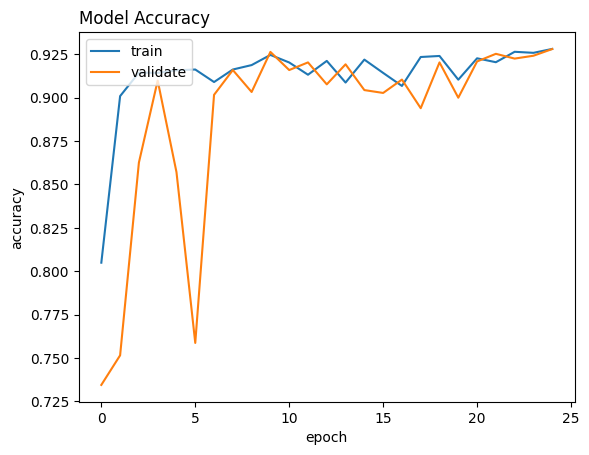

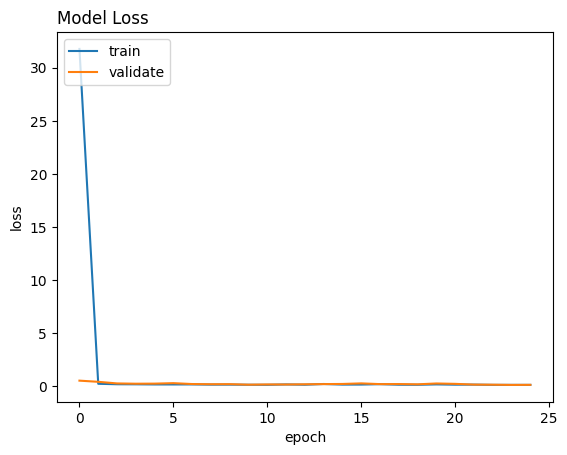

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# graph accuracy
#model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/CL/final_model/ALEX.hdf5')

plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('Model Accuracy', loc='left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

#graph loss
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model Loss', loc='left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(testy, yhat_classes)
# print('Accuracy: %f' % accuracy)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# precision tp / (tp + fp)
precision = precision_score(test_gen.classes, testpred, average= 'macro')
print('Precision: %f' % precision)


# recall: tp / (tp + fn)
recall = recall_score(test_gen.classes, testpred, average= 'macro')
print('Recall: %f' % recall)


# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_gen.classes, testpred, average= 'macro')
print('F1 score: %f' % f1)


Precision: 0.916148
Recall: 0.962843
F1 score: 0.935337


In [ ]:
from sklearn.metrics import confusion_matrix

#specificity
test_labels = test_gen.classes
test_pred = model.predict(test_gen)
test_pred_classes = np.argmax(test_pred, axis=1)

cm = confusion_matrix(test_labels, test_pred_classes)

specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity.append(tn / (tn + fp))

print(f'Specificity for Lung Cancer: {specificity[0]:.5f}')
print(f'Specificity for Normal: {specificity[1]:.5f}')
print(f'Specificity for COVID: {specificity[2]:.5f}')

29/29 [==============================] - 11s 385ms/step
Specificity for Lung Cancer: 0.98728
Specificity for Normal: 0.99369
Specificity for COVID: 0.99365


[[  86    0    0]
 [  22  205    2]
 [   0   10 1490]]


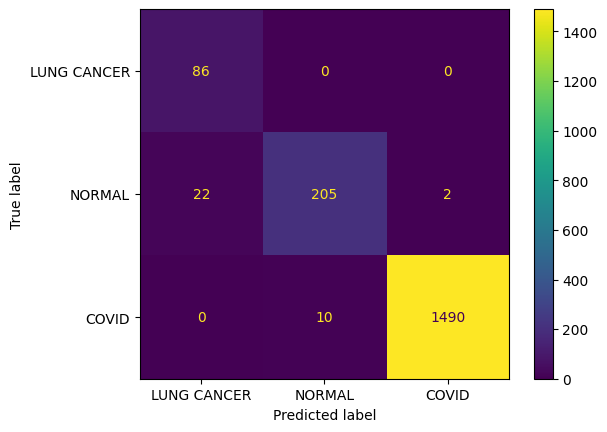

dict_keys(['Lung Cancer', 'Normal cases', 'covid'])

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix
matrix = confusion_matrix(test_gen.classes, testpred)
print(matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['LUNG CANCER', 'NORMAL','COVID'])

cm_display.plot()
plt.show()


test_gen.class_indices.keys()




In [ ]:
#VGG-16


train_datagen = ImageDataGenerator(dtype='float32')
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (224,244),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical')

Found 6658 images belonging to 3 classes.
Found 1815 images belonging to 3 classes.
Found 1819 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))




58889256/58889256 [==============================] - 0s 0us/step


In [ ]:

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dropout = layers.Dropout(0.5)
prediction_layer = layers.Dense(N_CLASSES, activation='softmax')


vgg16_model = models.Sequential([
    vgg16,
    flatten_layer,
    dense_layer_1,
    dropout,
    prediction_layer
])


In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001)
vgg16_model.compile(optimizer=adam_optimizer, 
                     loss='categorical_crossentropy',
                     metrics=['accuracy']) #need to update to use f1 score too

In [ ]:
#model.compile(optimizer = tensorflow.keras.optimizers.Adam(1e-5), loss = 'categorical_crossentropy', metrics = ['acc'])
# Defining callbacks
filepath = '/content/drive/MyDrive/Datasets/CL/final_model/VGG16.hdf5'

early_stopping = EarlyStopping(monitor = 'val_loss', 
                              mode = 'min' , 
                              patience = 15)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_loss', 
                                mode='min', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [early_stopping, checkpoint]

In [ ]:
history_model = vgg16_model.fit(train_generator,
                               epochs = 20,
                               verbose = 1,
                               validation_data = valid_generator,
                               callbacks = [checkpoint, early_stopping])


Epoch 1/20
105/105 [==============================] - ETA: 0s - loss: 5.7446 - accuracy: 0.7426
Epoch 1: val_loss improved from inf to 1.13393, saving model to /content/drive/MyDrive/Datasets/CL/final_model/VGG16.hdf5
105/105 [==============================] - 76s 638ms/step - loss: 5.7446 - accuracy: 0.7426 - val_loss: 1.1339 - val_accuracy: 0.8769
Epoch 2/20
105/105 [==============================] - ETA: 0s - loss: 1.9169 - accuracy: 0.8734
Epoch 2: val_loss improved from 1.13393 to 0.57462, saving model to /content/drive/MyDrive/Datasets/CL/final_model/VGG16.hdf5
105/105 [==============================] - 61s 576ms/step - loss: 1.9169 - accuracy: 0.8734 - val_loss: 0.5746 - val_accuracy: 0.9148
Epoch 3/20
105/105 [==============================] - ETA: 0s - loss: 0.9833 - accuracy: 0.9069
Epoch 3: val_loss improved from 0.57462 to 0.37606, saving model to /content/drive/MyDrive/Datasets/CL/final_model/VGG16.hdf5
105/105 [==============================] - 60s 572ms/step - loss: 0.98

In [ ]:
from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/CL/final_model/VGG16.hdf5')

pred_datagen = ImageDataGenerator(dtype='float32')
pred_generator = pred_datagen.flow_from_directory(valid_path,
                                            batch_size = BATCH_SIZE,
                                            target_size=(224,224),
                                            class_mode = 'categorical', 
                                            shuffle=False)
model_pred = model.predict(pred_generator)
pred = []
for i in model_pred:
  pred.append(np.argmax(i))

accuracy_score(pred_generator.classes, pred)


Found 1819 images belonging to 3 classes.
29/29 [==============================] - 25s 597ms/step


0.9840571742715778

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/CL/final_model/VGG16.hdf5')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_path,
                                            batch_size = BATCH_SIZE,
                                            target_size=(224,224),
                                            class_mode = 'categorical', 
                                            shuffle=False)
test_pred = model.predict(test_generator)
testpred = []
for i in test_pred:
  testpred.append(np.argmax(i))

accuracy_score(test_generator.classes, testpred)



Found 1815 images belonging to 3 classes.
29/29 [==============================] - 14s 483ms/step


0.9851239669421488

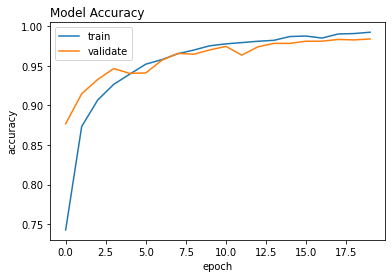

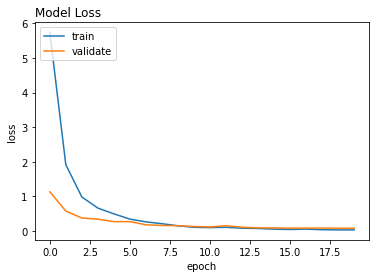

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# graph accuracy
#model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/CL/final_model/VGG16.hdf5')

plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('Model Accuracy', loc='left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

#graph loss
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model Loss', loc='left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(testy, yhat_classes)
# print('Accuracy: %f' % accuracy)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# precision tp / (tp + fp)
precision = precision_score(test_generator.classes, testpred, average= 'macro')
print('Precision: %f' % precision)


# recall: tp / (tp + fn)
recall = recall_score(test_generator.classes, testpred, average= 'macro')
print('Recall: %f' % recall)


# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_generator.classes, testpred, average= 'macro')
print('F1 score: %f' % f1)

Precision: 0.971013
Recall: 0.969472
F1 score: 0.970160


In [ ]:
from sklearn.metrics import confusion_matrix

#specificity
test_labels = test_generator.classes
test_pred = model.predict(test_generator)
test_pred_classes = np.argmax(test_pred, axis=1)

cm = confusion_matrix(test_labels, test_pred_classes)

specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity.append(tn / (tn + fp))

print(f'Specificity for Lung Cancer: {specificity[0]:.5f}')
print(f'Specificity for Normal: {specificity[1]:.5f}')
print(f'Specificity for COVID: {specificity[2]:.5f}')

29/29 [==============================] - 14s 478ms/step
Specificity for Lung Cancer: 0.99942
Specificity for Normal: 0.98991
Specificity for COVID: 0.96825


[[  83    3    0]
 [   1  218   10]
 [   0   13 1487]]


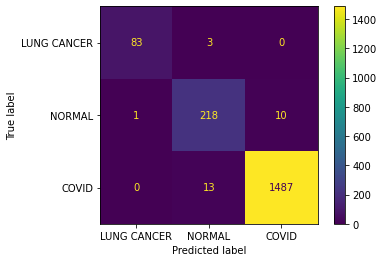

dict_keys(['Lung Cancer', 'Normal cases', 'covid'])

In [ ]:

# # kappa
# kappa = cohen_kappa_score(testy, yhat_classes)
# print('Cohens kappa: %f' % kappa)


# # ROC AUC
# auc = roc_auc_score(testy, yhat_probs)
# print('ROC AUC: %f' % auc)

from sklearn.metrics import confusion_matrix
from sklearn import metrics

# confusion matrix
matrix = confusion_matrix(test_generator.classes, testpred)
print(matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['LUNG CANCER', 'NORMAL','COVID'])

cm_display.plot()
plt.show()


test_generator.class_indices.keys()

In [ ]:
# DETECTION - USER OPERATED - ALEXNET MODEL

import cv2
import tensorflow as tf
import numpy as np
from google.colab import files

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/CL/final_model/ALEX.hdf5')

# Define the classes
classes = ['LUNG CANCER', 'NORMAL','COVID']

# Browse for the test image
uploaded = files.upload()

# Loop through all the uploaded images
for image_path in uploaded.keys():
  # Load the test image and preprocess it
  image = cv2.imread(image_path)
  image = cv2.resize(image, (224, 224))
  image = np.expand_dims(image, axis=0)

  # Predict the label of the test image
  predictions = model.predict(image)
  predicted_class = np.argmax(predictions)

  # Print the predicted class
  print(f"Image '{image_path}': Predicted class: {classes[predicted_class]}")



Saving COVID-19_0003.png to COVID-19_0003.png
Saving COVID-19_0004.png to COVID-19_0004.png
Saving COVID-19_0012.png to COVID-19_0012.png
Saving COVID-19_0013.png to COVID-19_0013.png
Saving COVID-19_0015.png to COVID-19_0015.png
Saving COVID-19_0024.png to COVID-19_0024.png
Saving COVID-19_0025.png to COVID-19_0025.png
Saving COVID-19_0043.png to COVID-19_0043.png
Saving COVID-19_0050.png to COVID-19_0050.png
Saving COVID-19_0056.png to COVID-19_0056.png
Saving COVID-19_0062.png to COVID-19_0062.png
Saving COVID-19_4340.png to COVID-19_4340.png
Saving COVID-19_4342.png to COVID-19_4342.png
Saving COVID-19_4349.png to COVID-19_4349.png
Saving COVID-19_4353.png to COVID-19_4353.png
Saving COVID-19_4356.png to COVID-19_4356.png
Saving COVID-19_4358.png to COVID-19_4358.png
Saving COVID-19_4362.png to COVID-19_4362.png
Saving COVID-19_4366.png to COVID-19_4366.png
Saving COVID-19_4374.png to COVID-19_4374.png
Saving COVID-19_4375.png to COVID-19_4375.png
Saving COVID-19_4378.png to COVID-

In [10]:
# DETECTION - USER OPERATED - VGG16 MODEL

import cv2
import tensorflow as tf
import numpy as np
from google.colab import files

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/CL/final_model/VGG16.hdf5')

# Define the classes
classes = ['LUNG CANCER', 'NORMAL','COVID']

# Browse for the test image
uploaded = files.upload()

# Loop through all the uploaded images
for image_path in uploaded.keys():
  # Load the test image and preprocess it
  image = cv2.imread(image_path)
  image = cv2.resize(image, (224, 224))
  image = np.expand_dims(image, axis=0)

  # Predict the label of the test image
  predictions = model.predict(image)
  predicted_class = np.argmax(predictions)

  # Print the predicted class
  print(f"Image '{image_path}': Predicted class: {classes[predicted_class]}")



Saving 161.png to 161 (1).png
Saving n8 (2).jpg to n8 (2).jpg
Saving Non-COVID-19_088.png to Non-COVID-19_088.png
Saving Non-COVID-19_204.png to Non-COVID-19_204.png
Saving Non-COVID-19_319.png to Non-COVID-19_319.png
Saving Non-COVID-19_407.png to Non-COVID-19_407.png
Saving Non-COVID-19_506.png to Non-COVID-19_506.png
Saving Non-COVID-19_578.png to Non-COVID-19_578.png
Saving Non-COVID-19_646.png to Non-COVID-19_646 (1).png
Saving Non-COVID-19_761.png to Non-COVID-19_761.png
1/1 [==============================] - 0s 137ms/step
Image '161.png': Predicted class: NORMAL
1/1 [==============================] - 0s 19ms/step
Image 'n8 (2).jpg': Predicted class: NORMAL
1/1 [==============================] - 0s 21ms/step
Image 'Non-COVID-19_088.png': Predicted class: COVID
1/1 [==============================] - 0s 22ms/step
Image 'Non-COVID-19_204.png': Predicted class: NORMAL
1/1 [==============================] - 0s 22ms/step
Image 'Non-COVID-19_319.png': Predicted class: NORMAL
1/1 [======